<a href="https://colab.research.google.com/github/EgorTrushin/HEG/blob/main/Lindhard_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construction of Lindhard function $X_0(q,i\omega)$
Construction of Lindhard function along imaginary frequency axis is implemented in fortran subroutine which is wrapped using F2PY.

To make numerical construction more stable, the expression for Lindhard function is rewritten as follows
\begin{equation}
\begin{split}
\chi_0 (q, i\omega) & = \frac{1}{2 \pi^2} \left( -1 + \left[ \frac{1}{2q} - \frac{q}{8} + \frac{\omega^2}{2q^3} \right] \ln \left[ \frac{(1-\frac{q}{2})^2 + \frac{\omega^2}{q^2}}{(1+\frac{q}{2})^2 + \frac{\omega^2}{q^2}} \right] + \frac{\omega}{q}\arctan\left[ \frac{(1-\frac{q}{2})q}{\omega} \right] + \frac{\omega}{q}\arctan\left[ \frac{(1+\frac{q}{2})q}{\omega} \right]\right) \\
 & = \frac{1}{2 \pi^2} \left( -1 + \left(\frac{\omega}{q}\right)^2 \frac{1}{2q} \left[ \left(\frac{q}{\omega}\right)^2 \left( 1-\frac{q^2}{4} \right) + 1 \right] \ln \left[  \frac{\left(\frac{q}{\omega}\right)^2 (1-\frac{q}{2})^2 + 1 }{\left(\frac{q}{\omega}\right)^2 (1+\frac{q}{2})^2 + 1 } \right] \right. \\
& \left. + \frac{\omega}{q}\arctan\left[ \left(1-\frac{q}{2}\right)\frac{q}{\omega} \right] + \frac{\omega}{q}\arctan\left[ \left(1+\frac{q}{2}\right)\frac{q}{\omega}\right]\right)
\end{split}
\end{equation}
Taylor series expansion is applied in the limit of small $q$-values
\begin{equation}
\chi_0(q,i\omega) = -\frac{1}{2 \pi^2}\left(\frac{q}{w}\right)^2\left\{\left\{ \frac{q^2}{6}+\frac{2}{5} -\left(\frac{q}{\omega}\right)^2\left[ \left( \frac{q^2}{24} + \frac{1}{3} \right)q^2 + \frac{2}{7} \right] \right\}\left(\frac{q}{\omega}\right)^2 -\frac{2}{3} \right\},
\end{equation}
when $\frac{q}{w}\leq 2 \cdot 10^{-3}$ and $\frac{q^2}{w}\leq 3 \cdot 10^{-3}$.

Also Taylor series expansion is applied for 'logarithmic' term of Lindhard function in the limit of large $q$-values
\begin{equation}
\begin{split}
A(q,i\omega)&=\frac{1}{2\pi^2}\left[ \frac{1}{2q} - \frac{q}{8} + \frac{\omega^2}{2q^3} \right] \ln \left[ \frac{(1-\frac{q}{2})^2 + \frac{\omega^2}{q^2}}{(1+\frac{q}{2})^2 + \frac{\omega^2}{q^2}} \right]\\& \approx \frac{1}{2\pi^2}\left[ - \frac{8}{3q^2} - \frac{32}{15q^4} - \frac{128}{35q^6} - \frac{8\omega^2}{q^4}  - \frac{64\omega^2}{3q^6} -\frac{384\omega^2}{5q^8} + \frac{32\omega^4}{q^8} + \frac{384\omega^4}{q^{10}} -\frac{128\omega^6}{q^{12}}\right]
\end{split}
\end{equation}
when $q>10^4$ and $\frac{q}{\omega^{\frac{1}{2}}}>10^2$.

In [ ]:
%%file lindhard_3d.f90
subroutine lindhard_3d(q,w,x0)
implicit none
real(8), intent(in) :: q, w
real(8), intent(out) :: x0
real(16) :: A, B, wdevq, qdevw, wdevq2, qdevw2, q2, q_qp, w_qp
real(8), parameter ::  thres1 = 3.5d-3, thres2 = 1.0d-3, &
                       thres3 = 1.0d5, thres4 = 1.0d4
real(16), parameter :: qpi = 4q0*atan(1q0)

q_qp = real(q,16)
w_qp = real(w,16)

if ((q/w < thres1) .and. (q**2/w < thres2)) then

    q2 = q_qp**2
    qdevw2 = (q_qp/w_qp)**2

    x0 = real(-1q0/(2q0*qpi**2)*&
         qdevw2*((q2/6q0+2q0/5q0-qdevw2*((q2/24q0+1q0/3q0)*q2+2q0/7q0))*qdevw2-2q0/3q0),8)

else

    wdevq = w_qp/q_qp
    qdevw = q_qp/w_qp

    if ((q > thres3) .and. (q/w**0.5d0 > thres4)) then

        A = -8q0/3q0*q_qp**(-2)&
            -32q0/15q0*q_qp**(-4)&
            -128q0/35q0*q_qp**(-6)&
            -8q0*w_qp**2*q_qp**(-4)&
            -64q0/3q0*w_qp**2*q_qp**(-6)&
            -384q0/5q0*w_qp**2*q_qp**(-8)&
            +32q0*w_qp**4*q_qp**(-8)&
            +384q0*w_qp**4*q_qp**(-10)&
            -128q0*w_qp**6*q_qp**(-12)

    else

        wdevq2 = wdevq**2
        qdevw2 = qdevw**2

        A = -1q0 + &
            wdevq2/(2q0*q_qp)*(qdevw2*(1q0-q_qp**2/4q0)+1q0)*&
            log((qdevw2*(1q0-0.5q0*q_qp)**2+1q0)/(qdevw2*(1q0+0.5q0*q_qp)**2+1q0))

    endif

    B = wdevq*atan((1q0-0.5q0*q_qp)*qdevw) + wdevq*atan((1q0+0.5q0*q_qp)*qdevw)

    x0 = real(-1q0/(2q0*qpi**2)*(A+B),8)

endif

end subroutine lindhard_3d

In [ ]:
! python3 -m numpy.f2py lindhard_3d.f90 -m lindhard_3d -h lindhard_3d.pyf
! python3 -m numpy.f2py -c --opt='-O3' --f90flags='-Wall -fbackslash -fbounds-check' lindhard_3d.pyf lindhard_3d.f90

Signature file "./lindhard_3d.pyf" exists!!! Use --overwrite-signature to overwrite.
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "lindhard_3d" sources
creating /tmp/tmp6tmgzcyh/src.linux-x86_64-3.7
f2py options: []
f2py: lindhard_3d.pyf
Reading fortran codes...
	Reading file 'lindhard_3d.pyf' (format:free)
Post-processing...
	Block: lindhard_3d
			Block: lindhard_3d
Post-processing (stage 2)...
Building modules...
	Building module "lindhard_3d"...
		Constructing wrapper function "lindhard_3d"...
		  x0 = lindhard_3d(q,w)
	Wrote C/API module "lindhard_3d" to file "/tmp/tmp6tmgzcyh/src.linux-x86_64-3.7/lindhard_3dmodule.c"
  adding '/tmp/tmp6tmgzcyh/src.linux-x86_64-3.7/fortranobject.c' to sources.
  adding '/tmp/tmp6tmgzcyh/src.linux-x86_64-3.7' to include_dirs.
copyin

Following code calculates and plots Lindhard function for $10^{-30}<q<10^{30}$ and $\omega=10^{-20}, 10^{-15}, 10^{-5}, 10^{5}, 10^{15}$, $10^{16}$ demonstraiting the stabiliy of implemented scheme. As can be seen, with presented scheme for construction, Lindhard function is unstable for $\omega > 10^{15}$.

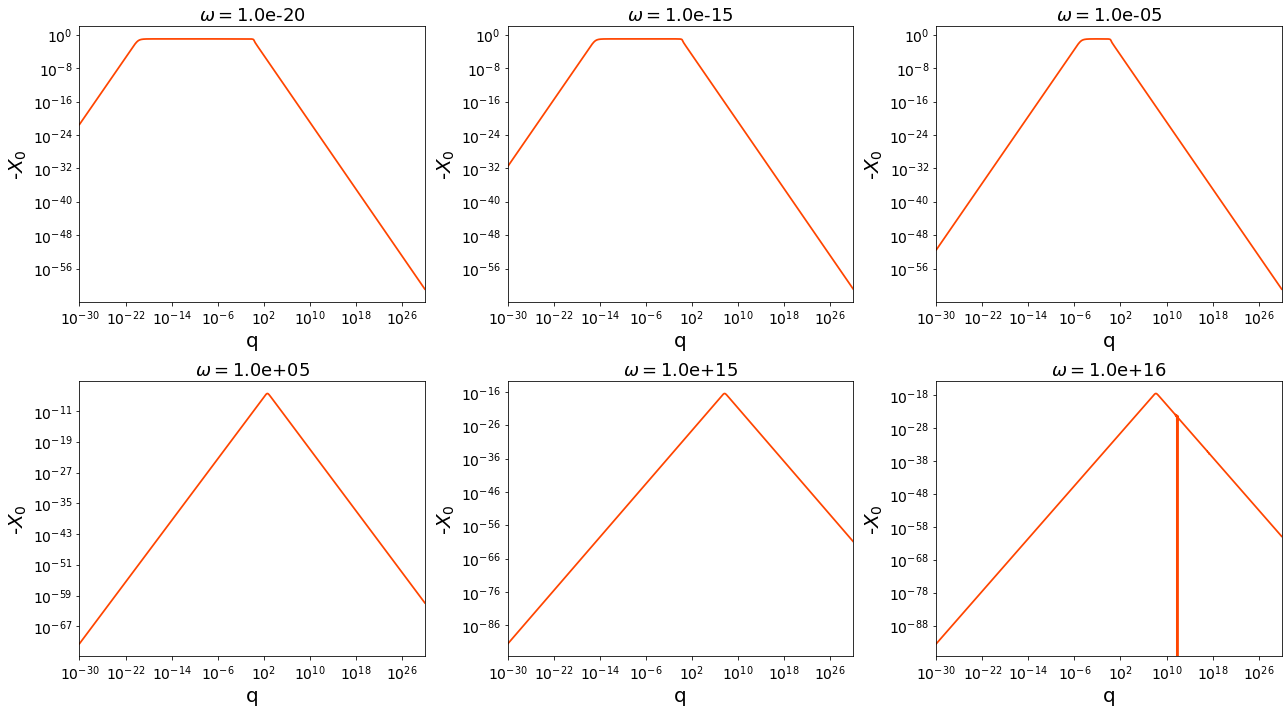

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lindhard_3d import lindhard_3d as lind

def style_ax(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('-$X_0$', fontsize=20)
    ax.set_xlabel('q', fontsize=20)
    ax.set_xlim(1.0e-30,1.0e+30)
    ax.tick_params(labelsize=14)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(18,10))

#for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
#    style_ax(ax)

q_space = np.logspace(-30,30,5000)
w_space = [1.0e-20, 1.0e-15, 1.0e-5, 1.0e5, 1.0e15, 1.0e16]

i = 0
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    style_ax(ax)
    lindhard = []
    for q in q_space:
        lindhard.append(lind(q,w_space[i]))
    ax.plot(q_space, lindhard, color='orangered', linewidth=1.75)
    ax.set_title('$\omega=${:4.1e}'.format(w_space[i]), fontsize=18)
    i+=1

plt.tight_layout()
plt.show()

## Behavior at $q \approx 2$
In the static limit $\frac{\partial \chi_0 (q,\omega=0)}{\partial q}$ is infinite [Kohn PRL 393 (1959)]:
\begin{equation}
\chi_0 (q,\omega=0) = \frac{1}{2\pi^2} \left[ 1 + \frac{1-q^2/4}{q}\ln \left| \frac{1+q/2}{1-q/2} \right| \right]
\end{equation}
\begin{equation}
\frac{\partial \chi_0 (q,\omega=0)}{\partial q} = \frac{1}{2\pi^2}\frac{q^2+4}{4q^2}\ln\left| \frac{q-2}{q+2} \right|
\end{equation}
\begin{equation}
\frac{\partial \chi_0 (q,\omega=0)}{\partial q}\Big|_{q=2} = -\infty
\end{equation}

The same feature remains in frequency-dependent case for $\omega \lessapprox 10^{-2}$. Following script illustrates this behaviour at $q \approx 2$.

In [ ]:
def static_lindhard_3d(q):
    """ Evaluates static Lindhard function for 3D HEG. """

    prefac = 1.0/(2.0*np.pi**2)
    body = (1.0+(1.0-q**2/4.0)/q*np.log(abs((1.0+q/2.0)/(1.0-q/2.0))))

    return prefac*body

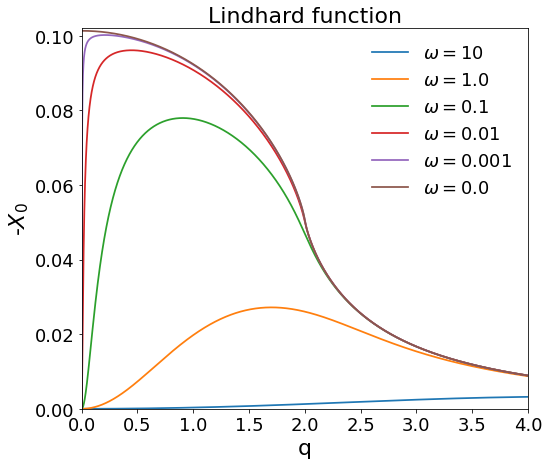

In [ ]:
q_space = np.linspace(0.0001,4,5000)
w_space = [10, 1.0, 0.1, 0.01, 0.001, 0.0]

plt.figure(figsize=(8,7))
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.ylim(0.0,0.102)
plt.xlim(0.0,4.0)

for w in w_space:
    lindhard = []
    for q in q_space:
        if w > 1.0e-14:
            lindhard.append(lind(q,w))
        else:
             lindhard.append(static_lindhard_3d(q))
    plt.plot(q_space, lindhard, linewidth=1.75, label='$\omega=$'+str(w))

plt.title('Lindhard function', fontsize=22)
plt.ylabel('-$X_0$', fontsize=22)
plt.xlabel('q', fontsize=22)
plt.legend(frameon=False,fontsize=18)
plt.show()